# Project proposal

This Project proposal is for the project of T5 Bootcamp requirements.

# The growth of the temperature over time

As the increase of temperature over time could cause certain issues for the planet, such as global warming '[wikipedia](https://en.wikipedia.org/wiki/Climate_change)', this project idea came to be to understand the growth of the average temperature over time.

# Aims

To describe the percentage of temperature growth over the years, and build a model to predict the temperature of the future years.

# Dataset

I'll use [Daily Temperature of Major Cities](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities/tasks?taskId=1060) dataset that could be found at [Kaggle](https://www.kaggle.com).

* This database contains observations from 1995 till 2021 for the average temperature
* It contains ***290,6327*** rows by ***8*** columns

***
Dataset Attributes:



 0   Region          ***object*** 
 
 1   Country         ***object*** 
 
 2   State           ***object*** 
 
 3   City            ***object*** 
 
 4   Month           ***int64***  
 
 5   Day             ***int64***  
 
 6   Year            ***int64***  
 
 7   AvgTemperature  **float64**  (Fahrenheit)
***


# Tools

EDA tools (***Pandas***,***Numpy***)

Visualization tools (***Seaborn***,***Matplotlib***)

Modeling tools (***sklearn***,***Statsmodels***)

# Steps

* I will start by exploring the data (EDA), then create a model to fit the data.


# Import Libraries

**Import the usual libraries, numpy,panda,seaborn.**

In [264]:
# Importing...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#We used [set_option] to show the full outputs of each cell.

## Get the Data

** Useing pandas to read our CSV file as name (dataframe)

In [265]:
# Reading our CSV Dataset file

df = pd.read_csv('city_temperature.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [266]:
# Mixing the Dataframe

from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

In [267]:
# Taking only 50,000 rows

df = df[:100000]

In [268]:
# Exploring the size of our data

df.shape

(100000, 8)

# 1: Exploratory Data Analysis (EDA)

We will proceed by first exploring our data and cleaning it if needed.

In [269]:
# print the Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   State           49590 non-null   object 
 3   City            100000 non-null  object 
 4   Month           100000 non-null  int64  
 5   Day             100000 non-null  int64  
 6   Year            100000 non-null  int64  
 7   AvgTemperature  100000 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


In [270]:
# Showing first 10 rows

df.head(10)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Europe,Ireland,NaN,Dublin,9,29,2002,59.3
1,North America,US,North Carolina,Asheville,2,10,2008,48.0
2,North America,US,Florida,Jacksonville,1,2,1999,59.2
3,Middle East,Israel,NaN,Tel Aviv,3,25,2003,50.7
4,North America,US,Kentucky,Louisville,6,10,2012,77.3
5,North America,US,Georgia,Macon,4,30,2002,61.3
6,North America,US,North Dakota,Bismarck,5,4,2009,52.3
7,North America,US,Oregon,Eugene,1,25,2005,41.6
8,Europe,Belgium,NaN,Brussels,4,6,2008,40.6
9,Europe,Bulgaria,NaN,Sofia,3,6,1997,40.7


In [271]:
# Showing statistical information about the Dataset

df.describe()

,Month,Day,Year,AvgTemperature
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.469180,15.687260,2006.569760,55.997618
std,3.451555,8.784877,25.932286,32.290747
min,1.000000,0.000000,200.000000,-99.000000
25%,3.000000,8.000000,2001.000000,45.900000
50%,6.000000,16.000000,2007.000000,62.700000
75%,9.000000,23.000000,2013.000000,75.500000
max,12.000000,31.000000,2020.000000,109.800000


* We notice -99 is an outlier

## Dealing with Nun-Values

In [272]:
# Here we see that only [State] column have Null values

df.isnull().sum()

Region                0
Country               0
State             50410
City                  0
Month                 0
Day                   0
Year                  0
AvgTemperature        0
dtype: int64

In [273]:
# We will drop this column because it contains a lot of nulls and we don't need it

df.drop(columns='State', inplace=True)

* \* Tip: If you used --> Mod() <-- method, you will get Texas in every Null state wich cause wrong info

In [274]:
# State column has been dropped

df.head(10)

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Europe,Ireland,Dublin,9,29,2002,59.3
1,North America,US,Asheville,2,10,2008,48.0
2,North America,US,Jacksonville,1,2,1999,59.2
3,Middle East,Israel,Tel Aviv,3,25,2003,50.7
4,North America,US,Louisville,6,10,2012,77.3
5,North America,US,Macon,4,30,2002,61.3
6,North America,US,Bismarck,5,4,2009,52.3
7,North America,US,Eugene,1,25,2005,41.6
8,Europe,Belgium,Brussels,4,6,2008,40.6
9,Europe,Bulgaria,Sofia,3,6,1997,40.7


### Outlier cleaning

In [275]:
rmOutLier = df[df["AvgTemperature"]>-90]["AvgTemperature"] # Takeing >-90 Temp

AvgCoulmnMean = rmOutLier.mean() # Taking the mean of the AvgTemperature

df["AvgTemperature"] = df["AvgTemperature"].replace(-99.0,AvgCoulmnMean) # replacing -99 values with the Averege

In [276]:
df.sample(n=25)

,Region,Country,City,Month,Day,Year,AvgTemperature
39953,North America,US,Savannah,9,22,1997,72.7
51785,Middle East,Saudi Arabia,Dhahran,7,6,2007,98.8
2239,North America,US,Fairbanks,6,15,2006,68.4
81900,North America,US,Los Angeles,2,7,2006,63.9
4671,North America,US,Oklahoma City,8,31,1996,73.8
62223,South/Central America & Carribean,Belize,Belize City,7,15,2014,85.2
80236,Asia,Uzbekistan,Tashkent,5,20,2018,70.7
65432,Asia,Philippines,Manila,11,5,2001,82.4
1082,North America,US,St Louis,1,18,2013,35.9
90977,Asia,China,Chengdu,9,27,2006,67.9


* We notice The average temperature of -99 outlier has dropped.

## Removing Duplications

In [277]:
# Show duplicated values

df.duplicated().sum()

31

In [278]:
# Remove duplicated values

df = df.drop_duplicates().reset_index(drop = True)

## Other improvments 

In [279]:
# Here we see wrong dates of [201,200] so we need to drop them

df['Year'].unique()

array([2002, 2008, 1999, 2003, 2012, 2009, 2005, 1997, 1996, 2006, 2001,
       1998, 2018, 2011, 2000, 1995, 2014, 2013, 2019, 2016, 2004, 2015,
       2010, 2020, 2007, 2017,  201,  200])

In [280]:
# Removing 200 & 201 Values

i = df.query('Year == 200').index
i2 = df.query('Year == 201').index

In [281]:
df = df.drop(i)
df = df.drop(i2)

## Renaming columns

In [282]:
# Changing the name of South/Central America & Carribean --> South America

df['Region'].replace({'South/Central America & Carribean': 'South America','Australia/South Pacific':'Australia'},inplace=True)


## More Exploring & Understanding the data

In [283]:
df['Region'].value_counts()

North America    52965
Europe           13297
Asia             10946
Africa            8842
South America     7686
Middle East       4238
Australia         1976
Name: Region, dtype: int64

In [284]:
df['Country'].value_counts()

US                          49562
Canada                       2504
China                        1651
Australia                    1644
India                        1291
Japan                         988
Brazil                        971
Spain                         946
Switzerland                   937
Germany                       915
Mexico                        899
United Kingdom                693
United Arab Emirates          652
France                        643
Turkey                        641
Pakistan                      633
Italy                         630
Saudi Arabia                  610
Nigeria                       583
Equador                       565
Russia                        418
Costa Rica                    369
Norway                        361
North Korea                   356
Benin                         353
Yugoslavia                    352
Czech Republic                351
Nepal                         351
Dominican Republic            350
Slovakia      

In [285]:
df['City'].value_counts()

Portland                640
Washington DC           639
Springfield             633
Charleston              617
Columbus                613
Washington              596
Munich                  384
San Jose                369
Fairbanks               364
Boise                   362
Oslo                    361
London                  361
North Platte            360
Phoenix                 357
Pyongyang               356
Elkins                  355
Sioux Falls             354
Calcutta                354
Cotonou                 353
Sydney                  352
Chicago                 352
Belgrade                352
Prague                  351
Katmandu                351
Santo Domingo           350
Bratislava              349
Medford                 349
Zagreb                  348
Algiers                 347
Guangzhou               347
Abu Dhabi               346
Copenhagen              346
Vienna                  345
Madrid                  345
Tokyo                   345
Libreville          

In [286]:
# Showing the average of each region

AvgTempRegion = df.groupby("Region")["AvgTemperature"].mean().sort_values()[-1::-1]
AvgTempRegion

Region
Middle East      73.718064
Africa           72.769487
South America    71.684126
Asia             68.069982
Australia        61.975264
North America    56.125491
Europe           52.297844
Name: AvgTemperature, dtype: float64

# 2: Visualization by Seaborn

### Average temperature in every region.

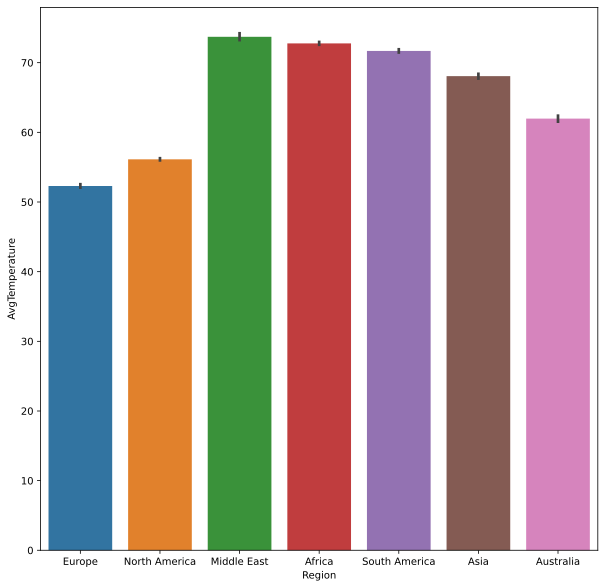

In [287]:
plt.figure(figsize=[10,10])
sns.barplot(x = 'Region',y='AvgTemperature',data=df);
plt.savefig('BarPlot.png')

* We notice the Middle East is slightly higher than all

### Average temperature in the Middle East over the years.

<AxesSubplot:xlabel='Year', ylabel='AvgTemperature'>

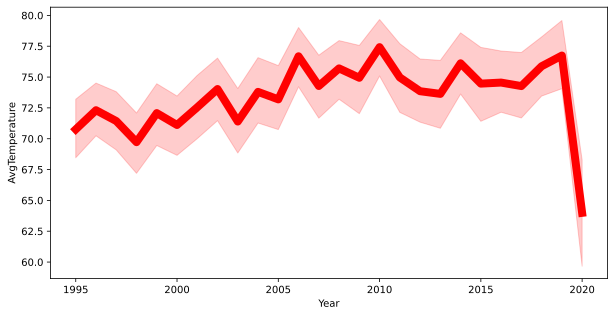

In [288]:
plt.figure(figsize=(10,5)) #figure size adjust
sns.lineplot(x = df.loc[df['Region']=='Middle East','Year'], y = df.loc[df['Region']=='Middle East','AvgTemperature'], lw=8, color = 'red')

* Here we notice that the middle east is semi-increasing.
* In 2020 Year, we noticed a huge decrease in temperature value, and that tells us the Dataset doesn't contain enough information in 2020.

## Average temperature by region over the years.

Text(0, 0.5, 'Average Temperature (Fahrenheit)')

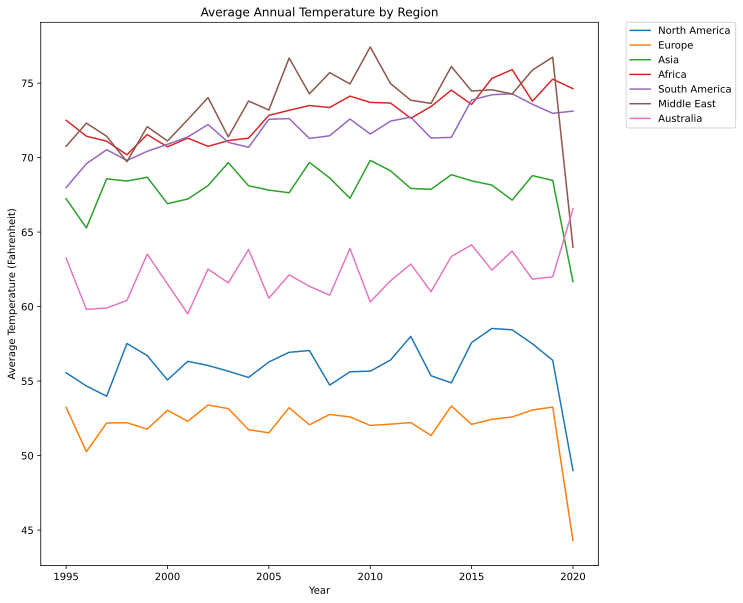

In [289]:
regions = ['North America', 'Europe', 'Asia', 'Africa', 'South America', 'Middle East'
           ,'Australia']

# Loop through each region and plot average temperature

plt.figure(figsize=(10,10))
for region in regions:
    temp = df[df['Region']== region]
    temp = temp.groupby("Year")["AvgTemperature"].mean()
    a = temp
    plt.plot(a)
    
plt.legend(regions, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Average Annual Temperature by Region')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Fahrenheit)')

### Average Temperature for every month over the years.

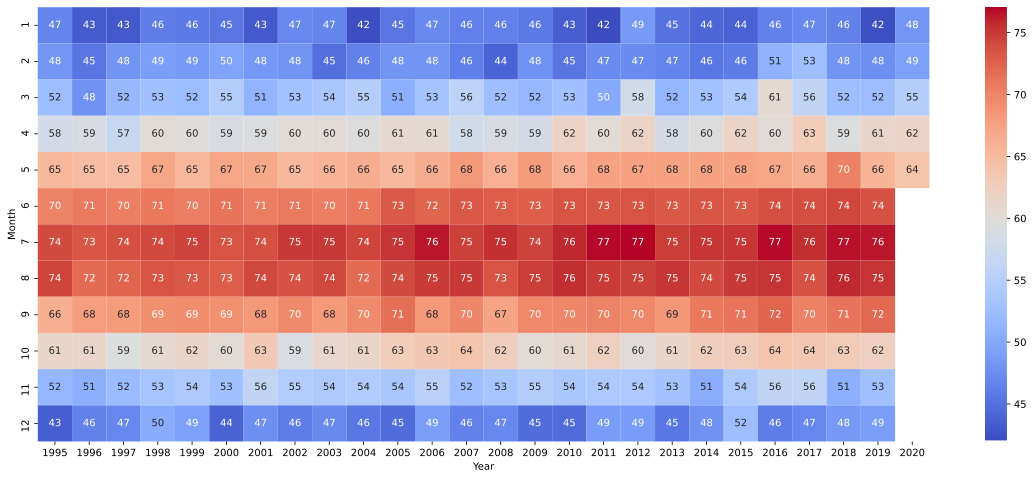

In [290]:
plt.figure(figsize=(20, 8))
OTY = pd.pivot_table(data=df,index='Month',values='AvgTemperature',columns='Year')

sns.heatmap(data =OTY, cmap='coolwarm', annot = True)
plt.ylabel('Month')
plt.show();

* This heat map shows the temperature over the years compared to the months.
* Here we notice missing values in 2020.

<AxesSubplot:>

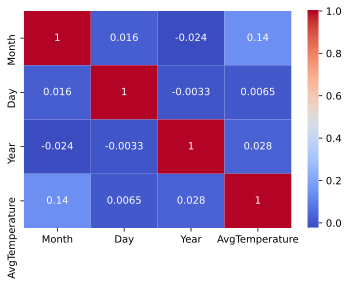

In [291]:
sns.heatmap(data=df.corr(), cmap='coolwarm', annot = True)

* Here we see no correlation between the numeric features.

# 3: Modeling

In this section, we will create different models and test them.

# Setting up the Data

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99950 entries, 0 to 99968
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          99950 non-null  object 
 1   Country         99950 non-null  object 
 2   City            99950 non-null  object 
 3   Month           99950 non-null  int64  
 4   Day             99950 non-null  int64  
 5   Year            99950 non-null  int64  
 6   AvgTemperature  99950 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 8.1+ MB


* Here we notice that we have 3 Categorical data, and 4 numerical data
* That means we need to transform them using dummy variables so sklearn will be able to understand them.
* Notice that our target is the AvgTemperature

In [293]:
data_x = df[["Region","Country","City","Month","Day","Year"]]
data_y = df[["AvgTemperature"]]

* Creating New dataSets for the Features and targets.

## Creating Dummy-variable

In [294]:
DumRegion = pd.get_dummies(data_x["Region"])
DumCountry = pd.get_dummies(data_x["Country"])
DumCity = pd.get_dummies(data_x["City"])
DumMonth = pd.get_dummies(data_x["Month"]) 
DumDay = pd.get_dummies(data_x["Day"]) 
DumYear = pd.get_dummies(data_x["Year"])

In [295]:
Data_X = pd.concat([DumRegion,DumDay,DumMonth,DumYear],axis=1)
Data_X.shape

(99950, 77)

* We dropped ***city*** & ***country*** to reduce the number of columns from ***525*** to ***74***
* Taking into consideration that it may be good to use 525 columns, however, that could cause a huge amount of calculation time.

## Train Test Split

Splitting our data into a training set and a testing set.

In [296]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Data_X,data_y,test_size=0.33)

In [297]:
print("x_train Shape ->",x_train.shape)
print("x_test Shape ->",x_test.shape)
print("y_train Shape ->",y_train.shape)
print("y_test Shape ->",y_test.shape)

x_train Shape -> (66966, 77)
x_test Shape -> (32984, 77)
y_train Shape -> (66966, 1)
y_test Shape -> (32984, 1)


## Training a Linear Regression Model

In [298]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(x_train,y_train)

lreg.score(x_test,y_test) # Calculate R^2

0.47556397016996266

In [299]:
adjusted_r_squared_1 = 1 - (1-(0.4582462275381046))*(len(data_y)-1)/(len(data_y)-Data_X.shape[1]-1) # this is constant
adjusted_r_squared_1 # Calculate Adj.R^2

0.45782854249645566

In [300]:
lreg.score(x_train,y_train)

0.4762380427451832

In [301]:
lreg.score(x_test,y_test)

0.47556397016996266

In [302]:
predictions = lreg.predict(x_test)

In [303]:
from sklearn import metrics
print('MAE = ',metrics.mean_absolute_error(y_test,predictions)) # mean absolute error
print('MSE = ',metrics.mean_squared_error(y_test,predictions)) # mean squared error
print('RMSE = ',metrics.mean_squared_error(y_test,predictions, squared=False)) # Root mean squared error

MAE =  10.654903311161654
MSE =  183.62143431552457
RMSE =  13.550698665217398


In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,predictions);
plt.xlabel('Y Test');
plt.ylabel('Predected Y');

## Training a Polynomial Regression Model

In [305]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2)

x_poly_2 = poly_2.fit_transform(Data_X)

lr_model_2 = LinearRegression()

lr_model_2.fit(x_poly_2,data_y)

lr_model_2.predict(poly_2.fit_transform(Data_X))


# Score

from sklearn.metrics import r2_score

r2Score_lr2 = r2_score(data_y,lr_model_2.predict(x_poly_2))

r2Score_lr2

0.5881911662054815

## Training a Random Forest Model

In [306]:
from sklearn.ensemble import RandomForestRegressor


model_rf = RandomForestRegressor(n_estimators=5) 

# n_estimators: It is the number of how many decision trees will be drawn. 

model_rf.fit(x_train,y_train)

model_rf.predict(x_test)


## Score 

from sklearn.metrics import r2_score

r2Score_rfreg = r2_score(y_test,model_rf.predict(x_test))

r2Score_rfreg

<ipython-input-306-ceb2b6428529>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train,y_train)


0.4705182593959728

## Conclusion

Based on the previous 3 algorithms, we can say the best model score we got is by the Polynomial Regression algorithm.

My conclusion is that this Dataset does not have enough data (features) to come up with a good model for the weather prediction. 